<a href="https://colab.research.google.com/github/LimPeiTing/Portfolio-Project/blob/main/Stock_Market_Analysis_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset from Kaggle: Stock Market Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data.csv")
df

,Company,Date,Close/Last,Volume,Open,High,Low
0,AAPL,07/17/2023,$193.99,50520160,$191.90,$194.32,$191.81
1,AAPL,07/14/2023,$190.69,41616240,$190.23,$191.1799,$189.63
2,AAPL,07/13/2023,$190.54,41342340,$190.50,$191.19,$189.78
3,AAPL,07-12-2023,$189.77,60750250,$189.68,$191.70,$188.47
4,AAPL,07-11-2023,$188.08,46638120,$189.16,$189.30,$186.60
...,...,...,...,...,...,...,...
25155,NFLX,07/24/2013,$34.4714,33395351,$35.6743,$36.0357,$34.3143
25156,NFLX,07/23/2013,$35.7514,76792963,$35.9143,$37.4621,$35.1714
25157,NFLX,07/22/2013,$37.4228,44791095,$38.1214,$38.3928,$36.7314
25158,NFLX,07/19/2013,$37.7966,18098750,$38.2043,$38.2784,$37.5971


In [3]:
df.head()

,Company,Date,Close/Last,Volume,Open,High,Low
0,AAPL,07/17/2023,$193.99,50520160,$191.90,$194.32,$191.81
1,AAPL,07/14/2023,$190.69,41616240,$190.23,$191.1799,$189.63
2,AAPL,07/13/2023,$190.54,41342340,$190.50,$191.19,$189.78
3,AAPL,07-12-2023,$189.77,60750250,$189.68,$191.70,$188.47
4,AAPL,07-11-2023,$188.08,46638120,$189.16,$189.30,$186.60


In [4]:
df.tail()

,Company,Date,Close/Last,Volume,Open,High,Low
25155,NFLX,07/24/2013,$34.4714,33395351,$35.6743,$36.0357,$34.3143
25156,NFLX,07/23/2013,$35.7514,76792963,$35.9143,$37.4621,$35.1714
25157,NFLX,07/22/2013,$37.4228,44791095,$38.1214,$38.3928,$36.7314
25158,NFLX,07/19/2013,$37.7966,18098750,$38.2043,$38.2784,$37.5971
25159,NFLX,07/18/2013,$38.0586,20418642,$38.6157,$38.6157,$37.7143


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25160 entries, 0 to 25159
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Company     25160 non-null  object
 1   Date        25160 non-null  object
 2   Close/Last  25160 non-null  object
 3   Volume      25160 non-null  int64 
 4   Open        25160 non-null  object
 5   High        25160 non-null  object
 6   Low         25160 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.3+ MB


In [6]:
df.shape

(25160, 7)

In [7]:
df.describe()


,Volume
count,2.516000e+04
mean,5.131764e+07
std,6.399143e+07
min,1.143952e+06
25%,1.200394e+07
50%,2.672083e+07
75%,6.857269e+07
max,1.065209e+09


In [8]:
df.isnull().sum()

,0
Company,0
Date,0
Close/Last,0
Volume,0
Open,0
High,0
Low,0


In [9]:
df.duplicated().sum()

0

Data preprocessing

1. Convert dtype for date to datetime
2. Cleaning all price columns, remove '$'
3. Convert all price columns dtype to float

In [14]:
df["Date"] = pd.to_datetime(df["Date"], format='mixed')

In [16]:
# Price columns cleaning and converting dtype
df["Close/Last"] = df["Close/Last"].str.replace("$","").astype(float)
df["Open"] = df["Open"].str.replace("$","").astype(float)
df["High"] = df["High"].str.replace("$","").astype(float)
df["Low"] = df["Low"].str.replace("$","").astype(float)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25160 entries, 0 to 25159
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Company     25160 non-null  object        
 1   Date        25160 non-null  datetime64[ns]
 2   Close/Last  25160 non-null  float64       
 3   Volume      25160 non-null  int64         
 4   Open        25160 non-null  float64       
 5   High        25160 non-null  float64       
 6   Low         25160 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 1.3+ MB


In [18]:
df["Company"].unique()

array(['AAPL', 'SBUX', 'MSFT', 'CSCO', 'QCOM', 'META', 'AMZN', 'TSLA',
       'AMD', 'NFLX'], dtype=object)

Data Visualization

Closing price over time for each company

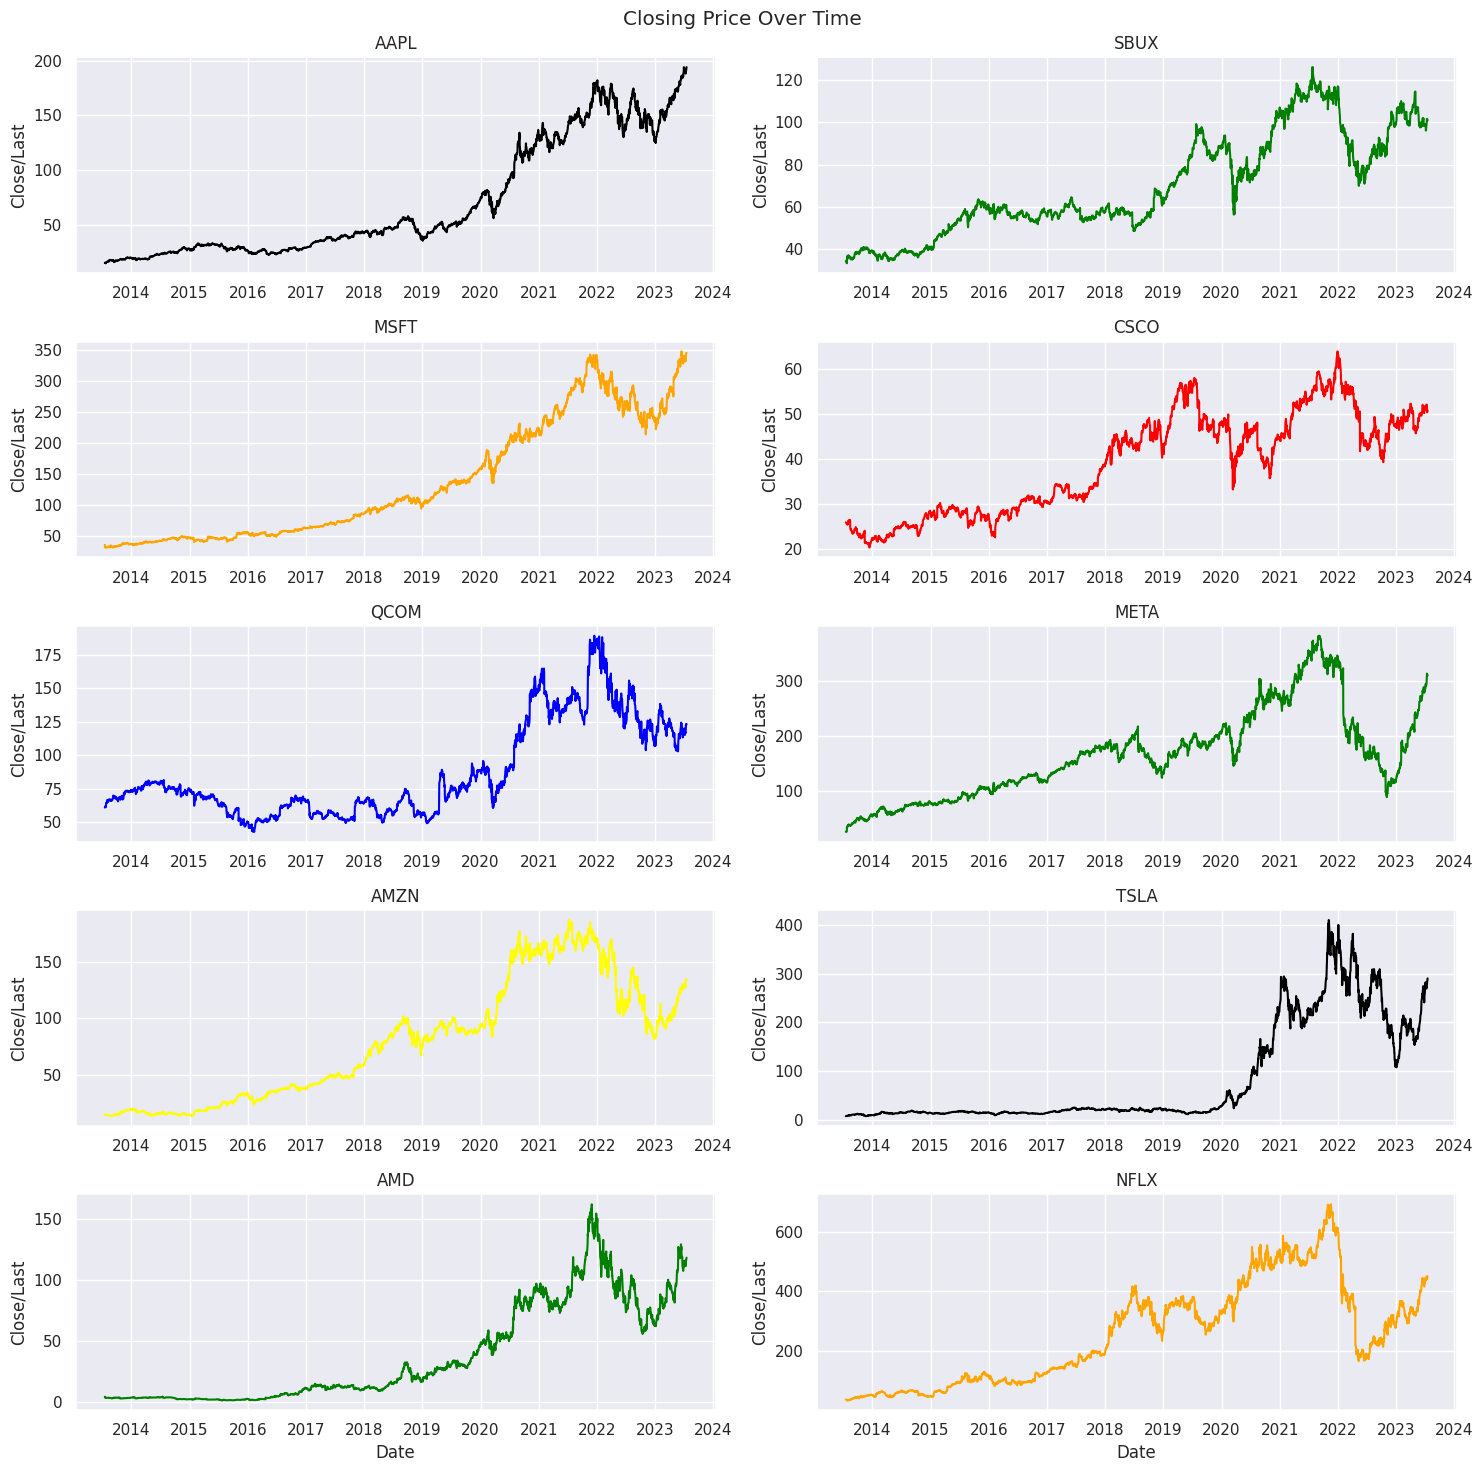

In [19]:
# Setting up the plot style
sns.set()

# Creating a grid of subplots
# plt.subplots() is used to create a grid of subplots.
# 5 rows, 2 columns: A total of 10 subplots are created (one for each company).
# sharex=True: All subplots share the same x-axis scale (time period).
# figsize=(15, 15): The overall size of the figure is specified as 15x15 inches.
fig, axes = plt.subplots(5,2, sharex = True, figsize = (15,15))

# Adding a main title
fig.suptitle("Closing Price Over Time")

# Plotting stock prices for individual companies
sns.lineplot(data = df[df["Company"] == "AAPL"], x = "Date", y = "Close/Last", ax = axes[0,0], color = "Black")
axes[0,0].set_title("AAPL")

sns.lineplot(data = df[df["Company"] == "SBUX"], x = "Date", y = "Close/Last", ax = axes[0,1], color = "Green")
axes[0,1].set_title("SBUX")

sns.lineplot(data = df[df["Company"] == "MSFT"], x = "Date", y = "Close/Last", ax = axes[1,0], color = "Orange")
axes[1,0].set_title("MSFT")

sns.lineplot(data = df[df["Company"] == "CSCO"], x = "Date", y = "Close/Last", ax = axes[1,1], color = "Red")
axes[1,1].set_title("CSCO")

sns.lineplot(data = df[df["Company"] == "QCOM"], x = "Date", y = "Close/Last", ax = axes[2,0], color = "Blue")
axes[2,0].set_title("QCOM")

sns.lineplot(data = df[df["Company"] == "META"], x = "Date", y = "Close/Last", ax = axes[2,1], color = "Green")
axes[2,1].set_title("META")

sns.lineplot(data = df[df["Company"] == "AMZN"], x = "Date", y = "Close/Last", ax = axes[3,0], color = "Yellow")
axes[3,0].set_title("AMZN")

sns.lineplot(data = df[df["Company"] == "TSLA"], x = "Date", y = "Close/Last", ax = axes[3,1], color = "Black")
axes[3,1].set_title("TSLA")

sns.lineplot(data = df[df["Company"] == "AMD"], x = "Date", y = "Close/Last", ax = axes[4,0], color = "Green")
axes[4,0].set_title("AMD")

sns.lineplot(data = df[df["Company"] == "NFLX"], x = "Date", y = "Close/Last", ax = axes[4,1], color = "Orange")
axes[4,1].set_title("NFLX")

# Adjusting tick labels
# Ensures that tick labels (dates) are displayed for all subplots, even if they are shared across subplots.
for ax in axes.flat:
  ax.tick_params(labelbottom=True)

# Final adjustments and display
plt.tight_layout()
plt.show()

Trend Analysis:

Rolling High: Helps identify when a stock is consistently reaching new highs, indicating an uptrend.

Rolling Low: Helps monitor when a stock is falling to new lows, signaling a downtrend.

Volatility Analysis:

A wide gap between rolling high and low indicates high volatility in the stock price.
    
A narrow gap suggests stability.

Risk Management:

Traders use rolling lows to set stop-loss levels to minimize losses.

Rolling highs help define profit targets.

1. Rolling High

Definition: The maximum stock price within a specific time window (e.g., 5 days, 20 days).

Purpose: Tracks the peak price over a given period to identify upward trends or areas of resistance (price levels that stocks struggle to break above).

2. Rolling Low
   
Definition: The minimum stock price within a specific time window (e.g., 5 days, 20 days).

Purpose: Tracks the lowest price over a given period to identify downward trends or areas of support (price levels that stocks tend not to fall below).

In [20]:
df["Rolling High"] = df.groupby("Company")["High"].rolling(window = 50).max().reset_index(0,drop = True)
df["Rolling Low"] = df.groupby("Company")["Low"].rolling(window = 50).min().reset_index(0,drop = True)

# Fill Missing Values
# Rolling operations may result in NaN values at the start of each company's data because there aren't enough rows (days) to calculate the rolling high/low (e.g., the first 49 rows for a 50-day window).
# fillna(method='ffill'): Fills the NaN values by forward-filling, i.e., propagating the last valid value forward.
df['Rolling High'] = df['Rolling High'].fillna(method='ffill')
df['Rolling Low'] = df['Rolling Low'].fillna(method='ffill')

df["Price Range"] = df["Rolling High"] - df["Rolling Low"]

In [21]:
df["Price Range"]

,Price Range
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
25155,13.3843
25156,12.1129
25157,11.4972
25158,11.4972


Volatility of stock price over time

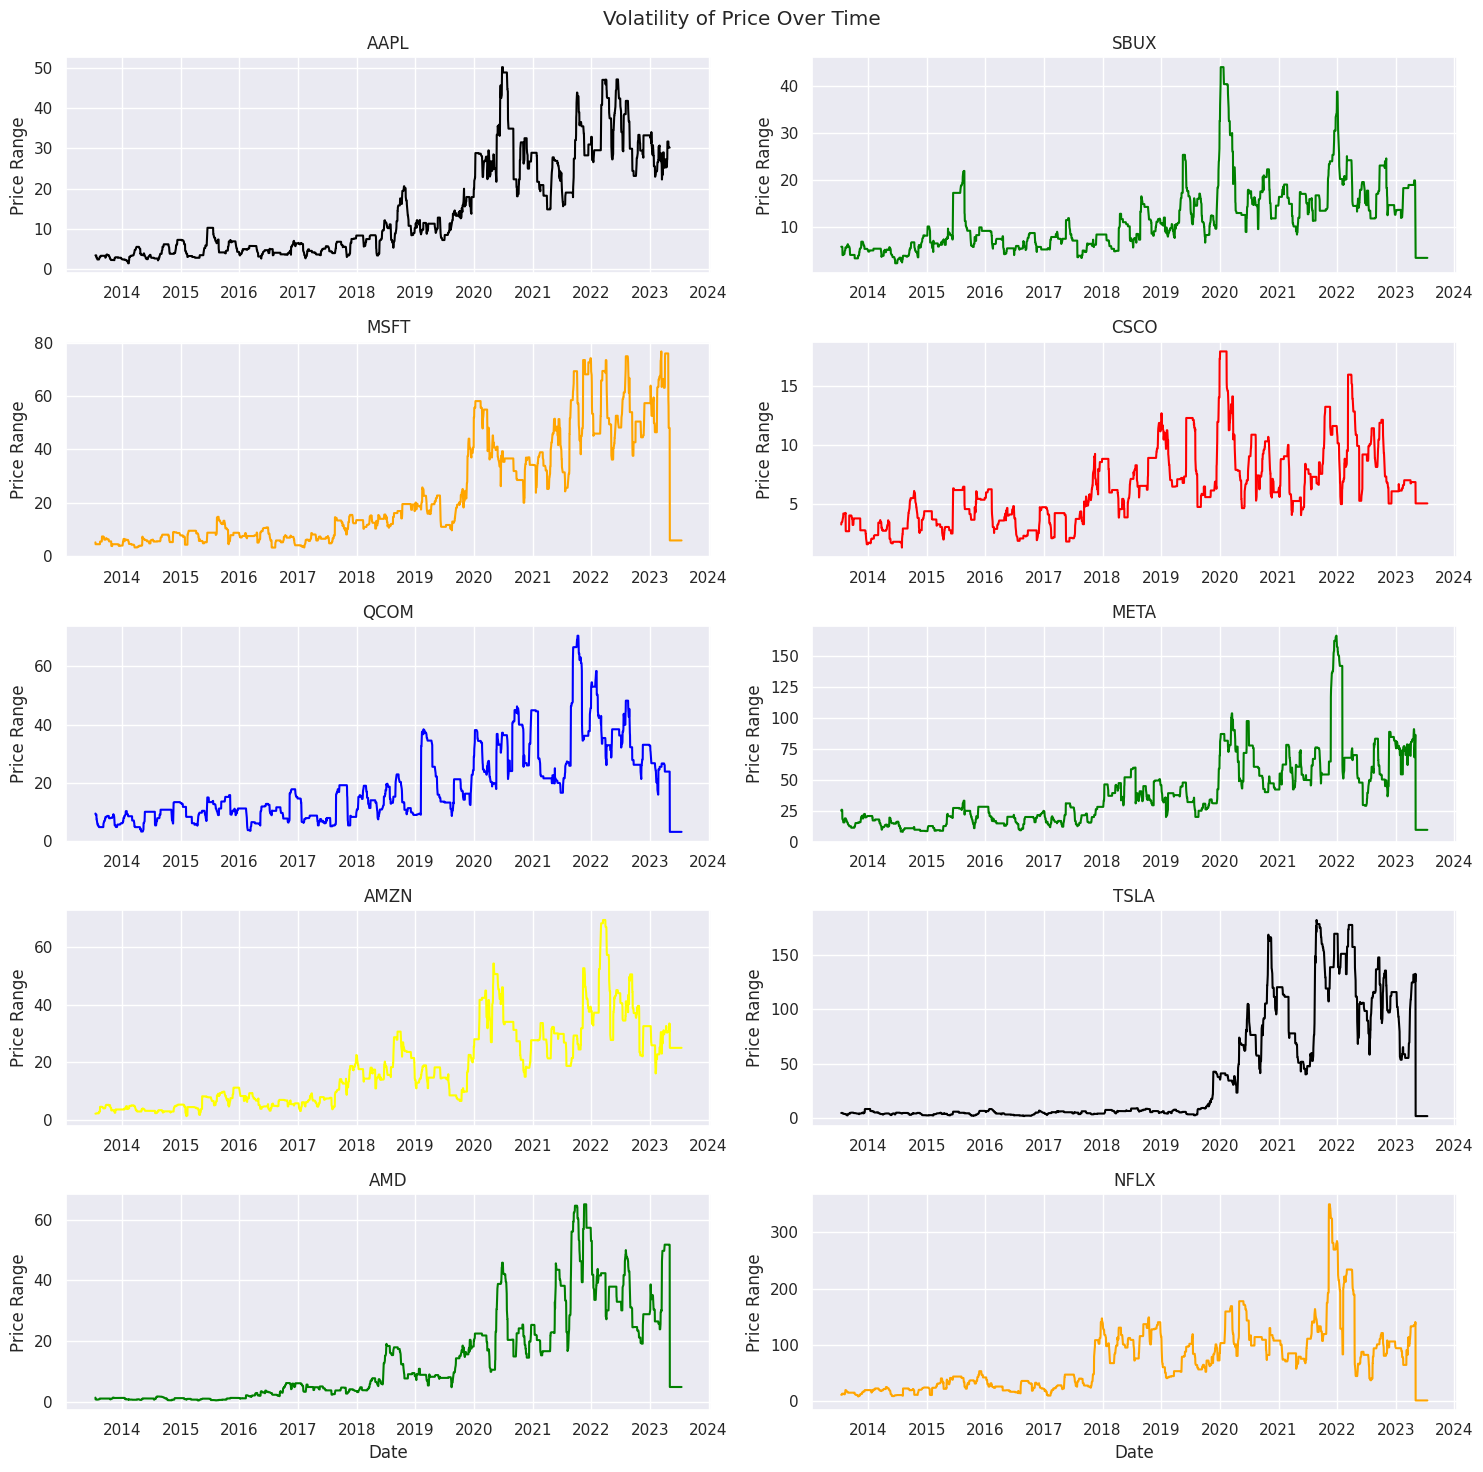

In [22]:
sns.set()
fig, axes = plt.subplots(5,2, sharex = True, figsize = (15,15))
fig.suptitle("Volatility of Price Over Time")

sns.lineplot(df[df["Company"] == "AAPL"], x = "Date", y = "Price Range", ax = axes[0,0], color = "Black")
axes[0,0].set_title("AAPL")

sns.lineplot(df[df["Company"] == "SBUX"], x = "Date", y = "Price Range", ax = axes[0,1], color = "Green")
axes[0,1].set_title("SBUX")

sns.lineplot(data = df[df["Company"] == "MSFT"], x = "Date", y = "Price Range", ax = axes[1,0], color = "Orange")
axes[1,0].set_title("MSFT")

sns.lineplot(data = df[df["Company"] == "CSCO"], x = "Date", y = "Price Range", ax = axes[1,1], color = "Red")
axes[1,1].set_title("CSCO")

sns.lineplot(data = df[df["Company"] == "QCOM"], x = "Date", y = "Price Range", ax = axes[2,0], color = "Blue")
axes[2,0].set_title("QCOM")

sns.lineplot(data = df[df["Company"] == "META"], x = "Date", y = "Price Range", ax = axes[2,1], color = "Green")
axes[2,1].set_title("META")

sns.lineplot(data = df[df["Company"] == "AMZN"], x = "Date", y = "Price Range", ax = axes[3,0], color = "Yellow")
axes[3,0].set_title("AMZN")

sns.lineplot(data = df[df["Company"] == "TSLA"], x = "Date", y = "Price Range", ax = axes[3,1], color = "Black")
axes[3,1].set_title("TSLA")

sns.lineplot(data = df[df["Company"] == "AMD"], x = "Date", y = "Price Range", ax = axes[4,0], color = "Green")
axes[4,0].set_title("AMD")

sns.lineplot(data = df[df["Company"] == "NFLX"], x = "Date", y = "Price Range", ax = axes[4,1], color = "Orange")
axes[4,1].set_title("NFLX")

for ax in axes.flat:
  ax.tick_params(labelbottom=True)
plt.tight_layout()
plt.show()

Moving Average

A moving average is a commonly used statistical method to smooth out stock price data and help identify trends by averaging the price over a specific time period. It is often used in financial markets to analyze price movements and eliminate noise from short-term price fluctuations.

In [23]:
# Calculate the moving average, short-term moving average (50-day), long-term moving average (200-day)

df["50-day MA"] = df.groupby("Company")["Close/Last"].rolling(window = 50).mean().reset_index(0,drop = True)
df["200-day MA"] = df.groupby("Company")["Close/Last"].rolling(window = 200).mean().reset_index(0,drop = True)

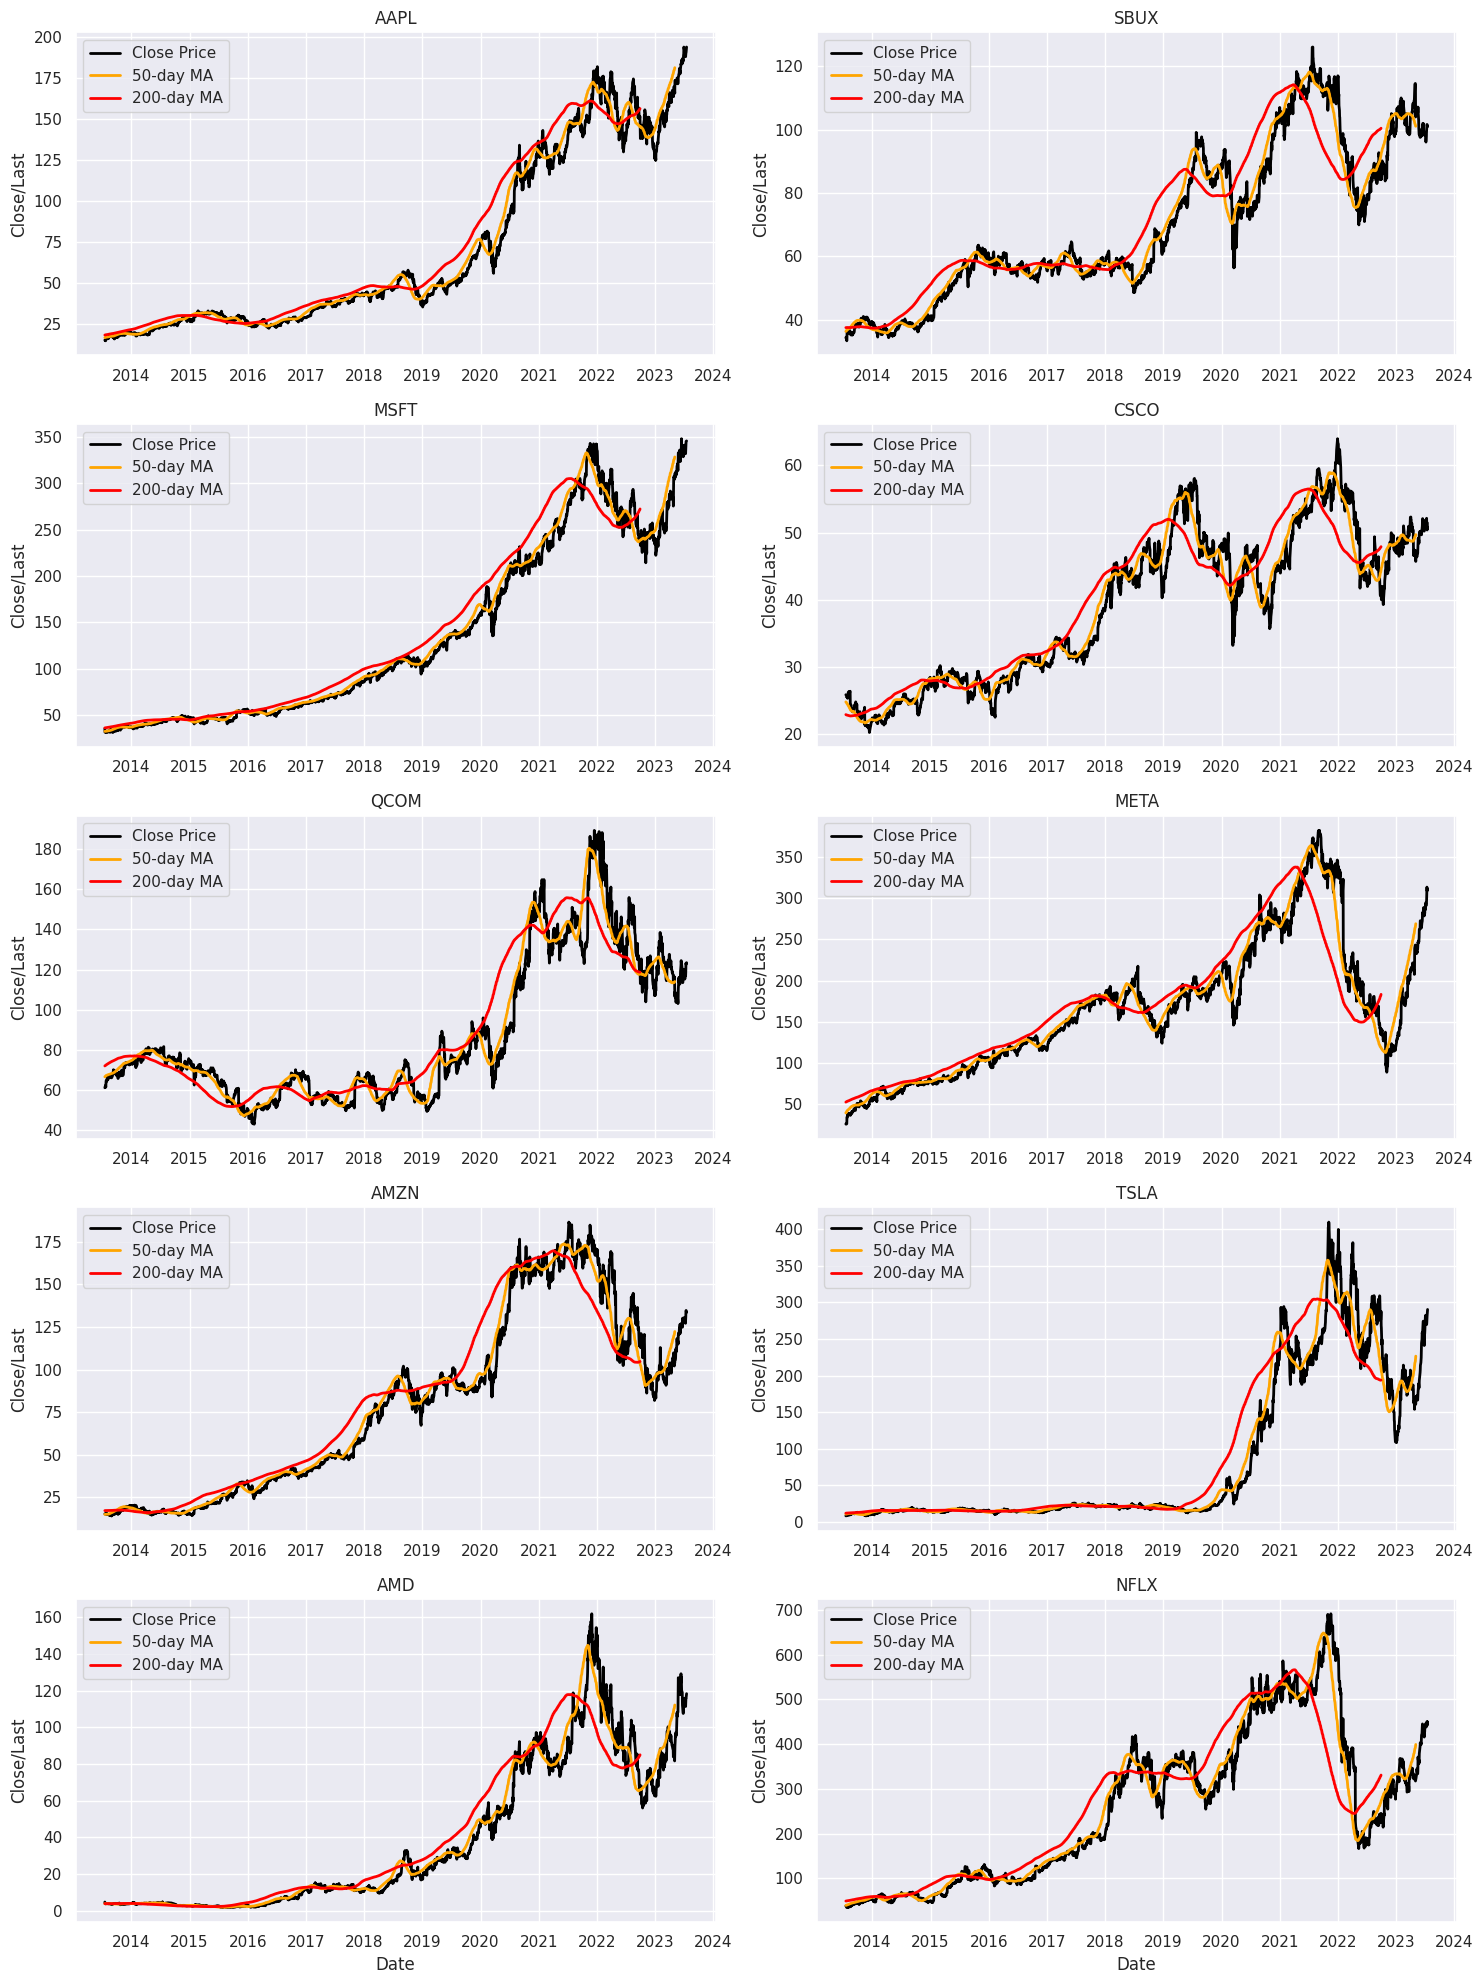

In [24]:
# Visualize on the moving average (MA)

fig, axes = plt.subplots(5,2, sharex = True, figsize = (15,20))
sns.lineplot(data = df[df["Company"] == "AAPL"], x = "Date", y = "Close/Last", ax = axes[0,0], color = "Black", linewidth = 2, label = "Close Price")
sns.lineplot(data = df[df["Company"] == "AAPL"], x = "Date", y = "50-day MA", ax = axes[0,0], color = "Orange", linewidth = 2, label = "50-day MA")
sns.lineplot(data = df[df["Company"] == "AAPL"], x = "Date", y = "200-day MA", ax = axes[0,0], color = "Red", linewidth = 2, label = "200-day MA")
axes[0,0].set_title("AAPL")

sns.lineplot(data = df[df["Company"] == "SBUX"], x = "Date", y = "Close/Last", ax = axes[0,1], color = "Black", linewidth = 2, label = "Close Price")
sns.lineplot(data = df[df["Company"] == "SBUX"], x = "Date", y = "50-day MA", ax = axes[0,1], color = "Orange", linewidth = 2, label = "50-day MA")
sns.lineplot(data = df[df["Company"] == "SBUX"], x = "Date", y = "200-day MA", ax = axes[0,1], color = "Red", linewidth = 2, label = "200-day MA")
axes[0,1].set_title("SBUX")

sns.lineplot(data = df[df["Company"] == "MSFT"], x = "Date", y = "Close/Last", ax = axes[1,0], color = "Black", linewidth = 2, label = "Close Price")
sns.lineplot(data = df[df["Company"] == "MSFT"], x = "Date", y = "50-day MA", ax = axes[1,0], color = "Orange", linewidth = 2, label = "50-day MA")
sns.lineplot(data = df[df["Company"] == "MSFT"], x = "Date", y = "200-day MA", ax = axes[1,0], color = "Red", linewidth = 2, label = "200-day MA")
axes[1,0].set_title("MSFT")

sns.lineplot(data = df[df["Company"] == "CSCO"], x = "Date", y = "Close/Last", ax = axes[1,1], color = "Black", linewidth = 2, label = "Close Price")
sns.lineplot(data = df[df["Company"] == "CSCO"], x = "Date", y = "50-day MA", ax = axes[1,1], color = "Orange", linewidth = 2, label = "50-day MA")
sns.lineplot(data = df[df["Company"] == "CSCO"], x = "Date", y = "200-day MA", ax = axes[1,1], color = "Red", linewidth = 2, label = "200-day MA")
axes[1,1].set_title("CSCO")

sns.lineplot(data = df[df["Company"] == "QCOM"], x = "Date", y = "Close/Last", ax = axes[2,0], color = "Black", linewidth = 2, label = "Close Price")
sns.lineplot(data = df[df["Company"] == "QCOM"], x = "Date", y = "50-day MA", ax = axes[2,0], color = "Orange", linewidth = 2, label = "50-day MA")
sns.lineplot(data = df[df["Company"] == "QCOM"], x = "Date", y = "200-day MA", ax = axes[2,0], color = "Red", linewidth = 2, label = "200-day MA")
axes[2,0].set_title("QCOM")

sns.lineplot(data = df[df["Company"] == "META"], x = "Date", y = "Close/Last", ax = axes[2,1], color = "Black", linewidth = 2, label = "Close Price")
sns.lineplot(data = df[df["Company"] == "META"], x = "Date", y = "50-day MA", ax = axes[2,1], color = "Orange", linewidth = 2, label = "50-day MA")
sns.lineplot(data = df[df["Company"] == "META"], x = "Date", y = "200-day MA", ax = axes[2,1], color = "Red", linewidth = 2, label = "200-day MA")
axes[2,1].set_title("META")

sns.lineplot(data = df[df["Company"] == "AMZN"], x = "Date", y = "Close/Last", ax = axes[3,0], color = "Black", linewidth = 2, label = "Close Price")
sns.lineplot(data = df[df["Company"] == "AMZN"], x = "Date", y = "50-day MA", ax = axes[3,0], color = "Orange", linewidth = 2, label = "50-day MA")
sns.lineplot(data = df[df["Company"] == "AMZN"], x = "Date", y = "200-day MA", ax = axes[3,0], color = "Red", linewidth = 2, label = "200-day MA")
axes[3,0].set_title("AMZN")

sns.lineplot(data = df[df["Company"] == "TSLA"], x = "Date", y = "Close/Last", ax = axes[3,1], color = "Black", linewidth = 2, label = "Close Price")
sns.lineplot(data = df[df["Company"] == "TSLA"], x = "Date", y = "50-day MA", ax = axes[3,1], color = "Orange", linewidth = 2, label = "50-day MA")
sns.lineplot(data = df[df["Company"] == "TSLA"], x = "Date", y = "200-day MA", ax = axes[3,1], color = "Red", linewidth = 2, label = "200-day MA")
axes[3,1].set_title("TSLA")

sns.lineplot(data = df[df["Company"] == "AMD"], x = "Date", y = "Close/Last", ax = axes[4,0], color = "Black", linewidth = 2, label = "Close Price")
sns.lineplot(data = df[df["Company"] == "AMD"], x = "Date", y = "50-day MA", ax = axes[4,0], color = "Orange", linewidth = 2, label = "50-day MA")
sns.lineplot(data = df[df["Company"] == "AMD"], x = "Date", y = "200-day MA", ax = axes[4,0], color = "Red", linewidth = 2, label = "200-day MA")
axes[4,0].set_title("AMD")

sns.lineplot(data = df[df["Company"] == "NFLX"], x = "Date", y = "Close/Last", ax = axes[4,1], color = "Black", linewidth = 2, label = "Close Price")
sns.lineplot(data = df[df["Company"] == "NFLX"], x = "Date", y = "50-day MA", ax = axes[4,1], color = "Orange", linewidth = 2, label = "50-day MA")
sns.lineplot(data = df[df["Company"] == "NFLX"], x = "Date", y = "200-day MA", ax = axes[4,1], color = "Red", linewidth = 2, label = "200-day MA")
axes[4,1].set_title("NFLX")

for ax in axes.flat:
  ax.tick_params(labelbottom=True)
plt.tight_layout()
plt.show()

Correlation matrix

In [25]:
correlation = df.pivot(index = "Date", columns = "Company", values = "Close/Last")
correlation

Company,AAPL,AMD,AMZN,CSCO,META,MSFT,NFLX,QCOM,SBUX,TSLA
Date,,,,,,,,,,
2013-07-18,15.4199,4.64,15.2055,25.86,26.180,35.44,38.0586,61.115,34.240,7.9353
2013-07-19,15.1768,4.03,15.2615,25.82,25.881,31.40,37.7966,61.460,34.395,7.9787
2013-07-22,15.2254,3.90,15.1740,25.72,26.045,32.01,37.4228,62.210,34.510,8.1620
2013-07-23,14.9639,3.66,15.0530,25.56,26.130,31.82,35.7514,62.300,33.830,8.1827
2013-07-24,15.7325,3.63,14.9470,25.59,26.510,31.96,34.4714,61.390,33.305,8.1133
...,...,...,...,...,...,...,...,...,...,...
2023-07-11,188.0800,111.32,128.7800,52.12,298.290,332.47,440.2100,116.870,100.090,269.7900
2023-07-12,189.7700,114.58,130.8000,50.74,309.340,337.20,444.0500,118.680,101.140,271.9900
2023-07-13,190.5400,115.92,134.3000,51.53,313.410,342.66,450.3800,123.120,101.600,277.9000


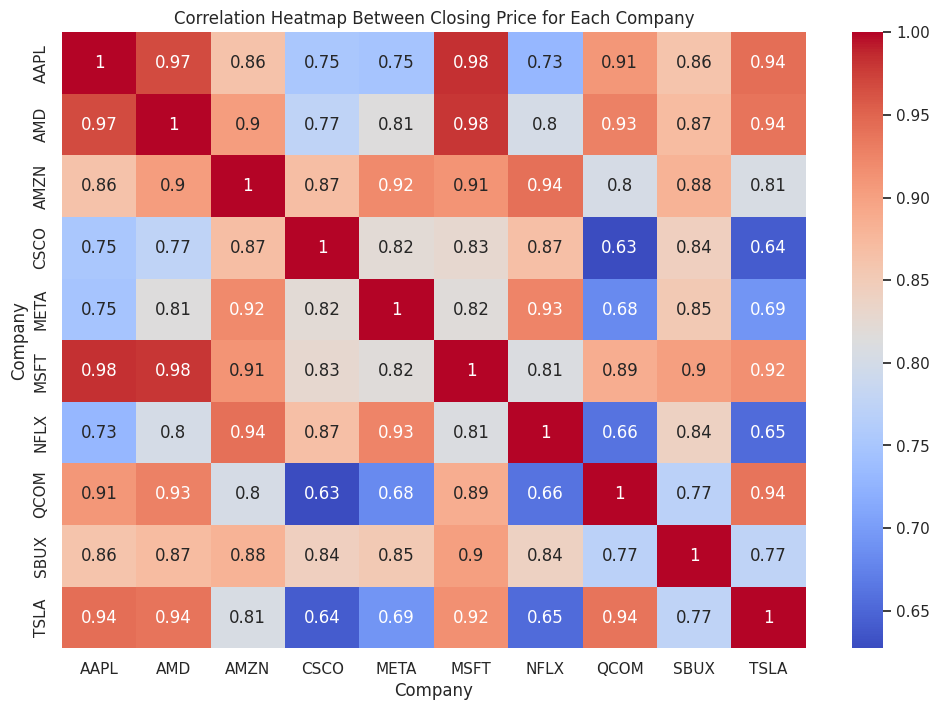

In [26]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap Between Closing Price for Each Company')
plt.show()

Top performers based on stock price growth

In [27]:
start = "2022-01-01"
end = "2023-12-31"
df2 = df[(df["Date"] >= start) & (df["Date"] <= end)]
df2

,Company,Date,Close/Last,Volume,Open,High,Low,Rolling High,Rolling Low,Price Range,50-day MA,200-day MA
0,AAPL,2023-07-17,193.99,50520160,191.90,194.3200,191.8100,NaN,NaN,NaN,NaN,NaN
1,AAPL,2023-07-14,190.69,41616240,190.23,191.1799,189.6300,NaN,NaN,NaN,NaN,NaN
2,AAPL,2023-07-13,190.54,41342340,190.50,191.1900,189.7800,NaN,NaN,NaN,NaN,NaN
3,AAPL,2023-07-12,189.77,60750250,189.68,191.7000,188.4700,NaN,NaN,NaN,NaN,NaN
4,AAPL,2023-07-11,188.08,46638120,189.16,189.3000,186.6000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
23024,NFLX,2022-01-07,541.06,3382873,549.46,553.4300,538.2175,553.4300,329.82,223.6100,409.3866,276.857225
23025,NFLX,2022-01-06,553.29,5711795,554.34,563.3600,542.0100,563.3600,329.82,233.5400,412.9606,278.211425
23026,NFLX,2022-01-05,567.52,4148749,592.00,592.8400,566.8800,592.8400,329.82,263.0200,416.6990,279.601175
23027,NFLX,2022-01-04,591.15,4393135,599.91,600.4099,581.6000,600.4099,329.82,270.5899,421.0940,281.216125


In [28]:
# Calculating stock price growth

start_stock_price = df2.groupby("Company")["Close/Last"].first()
end_stock_price = df2.groupby("Company")["Close/Last"].last()

# Stock price growth calculation
stock_price_growth = ((end_stock_price - start_stock_price) / start_stock_price) *100
stock_price_growth_sort = stock_price_growth.sort_values(ascending = False)

# Display the stock price
print(stock_price_growth_sort)

Company
QCOM    50.899514
TSLA    37.725257
NFLX    32.734141
AMZN    27.586478
AMD     26.977688
CSCO    24.306239
SBUX    15.604875
META     8.988475
MSFT    -3.175889
AAPL    -6.175576
Name: Close/Last, dtype: float64


Visualize on the stock price growth for each company

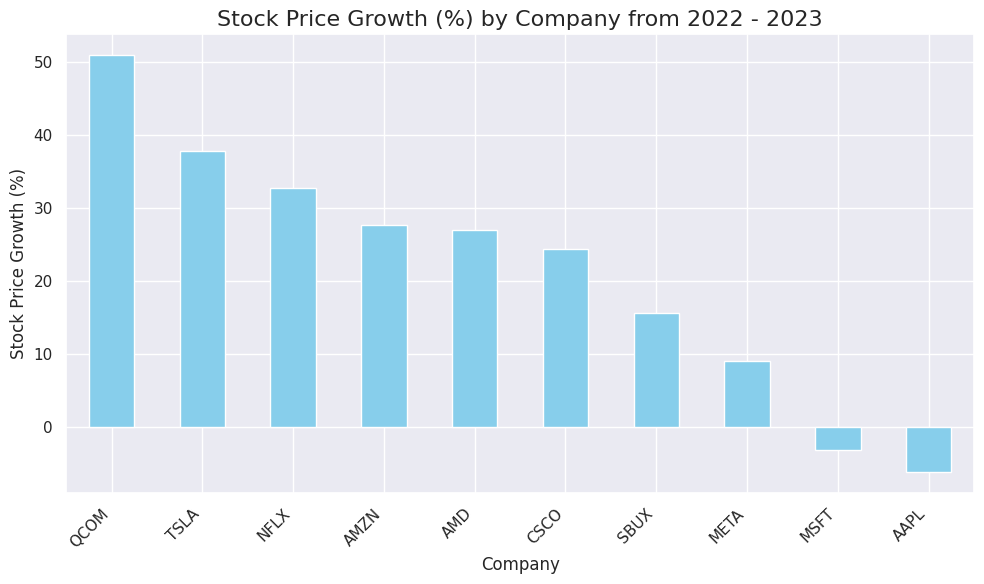

In [29]:
# Plotting the stock price growth
plt.figure(figsize=(10, 6))
stock_price_growth_sort.plot(kind='bar', color='skyblue')

# Adding title and labels
plt.title("Stock Price Growth (%) by Company from 2022 - 2023", fontsize=16)
plt.xlabel("Company", fontsize=12)
plt.ylabel("Stock Price Growth (%)", fontsize=12)

# Displaying the plot
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Total Trading Volume

In [30]:
total_volume = df2.groupby("Company")["Volume"].sum()
total_volume_sort = total_volume.sort_values(ascending = False)

print(total_volume_sort)

Company
TSLA    42449562359
AMD     31570269600
AAPL    30354618590
AMZN    27713133570
META    12654666135
MSFT    11805742352
CSCO     7812738510
NFLX     3692790733
QCOM     3431522069
SBUX     3050354211
Name: Volume, dtype: int64


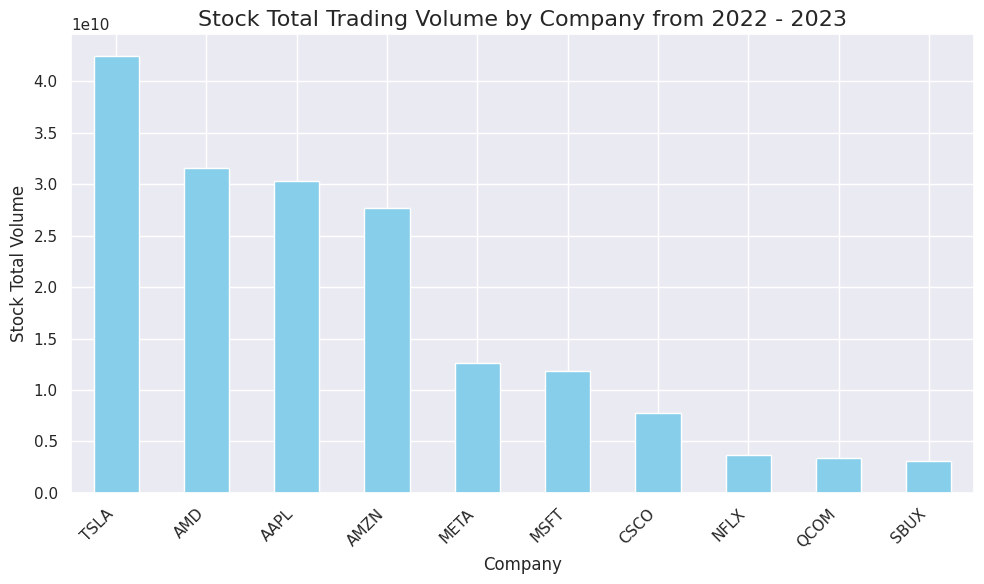

In [31]:
# Plotting the stock total volume
plt.figure(figsize=(10, 6))
total_volume_sort.plot(kind='bar', color='skyblue')

# Adding title and labels
plt.title("Stock Total Trading Volume by Company from 2022 - 2023", fontsize=16)
plt.xlabel("Company", fontsize=12)
plt.ylabel("Stock Total Volume", fontsize=12)

# Displaying the plot
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

LSTM Model for Stock Price Prediction

In [32]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [46]:
df_AMZN = df2[df2['Company'] == 'AMZN']

1. Normalize the Data:

In [47]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_AMZN['Close/Last'].values.reshape(-1, 1))

scaled_data

array([[0.58407509],
       [0.59671839],
       [0.5924287 ],
       [0.5529184 ],
       [0.53011531],
       [0.51148903],
       [0.54140397],
       [0.52537408],
       [0.54817716],
       [0.54637098],
       [0.54795139],
       [0.5201813 ],
       [0.53305036],
       [0.53463078],
       [0.51374676],
       [0.53632407],
       [0.54558077],
       [0.48552512],
       [0.49624934],
       [0.49297563],
       [0.51126326],
       [0.50347408],
       [0.50618336],
       [0.50516738],
       [0.469721  ],
       [0.4789777 ],
       [0.44488596],
       [0.50561893],
       [0.49083079],
       [0.4789777 ],
       [0.46227049],
       [0.43754833],
       [0.44974008],
       [0.43224266],
       [0.37455763],
       [0.39431277],
       [0.37444474],
       [0.37467051],
       [0.38866845],
       [0.41011689],
       [0.38020195],
       [0.35649578],
       [0.33166073],
       [0.32104939],
       [0.34272361],
       [0.32025919],
       [0.27995868],
       [0.271

2. Create Training Data: Divide data into sequences of input (X_train) and target (y_train)

In [48]:
# Create sequences for LSTM (e.g., look back 60 days to predict the next day)
look_back = 60
X_train, y_train = [], []

for i in range(look_back, len(scaled_data)):
    X_train.append(scaled_data[i-look_back:i, 0])  # 60 previous days
    y_train.append(scaled_data[i, 0])             # Predict the next day

# Convert to numpy arrays and reshape for LSTM
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)


3. Build the LSTM Model

Create an LSTM model using Keras.

In [49]:
# Initialize the LSTM model
model = Sequential()

# Add LSTM layers
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))

# Add a Dense layer to predict the output
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


4. Train the Model

Fit the model to your training data.

In [50]:
# Train the model (adjust epochs and batch size if needed)
model.fit(X_train, y_train, batch_size=32, epochs=10)


Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.1405
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0225
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0149
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0123
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0102
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0095
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0088
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0098
Epoch 9/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0084
Epoch 10/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0078


5. Make Predictions

Use the trained model to predict future stock prices.

In [51]:
# Prepare test data (use the last 60 days for predictions)
test_data = scaled_data[-look_back:]
X_test = [test_data]
X_test = np.array(X_test).reshape(1, look_back, 1)


In [52]:
# Predict the stock price for the next day
predicted_price = model.predict(X_test)
predicted_price = scaler.inverse_transform(predicted_price)  # Convert back to original scale
print("Predicted Stock Price for the Next Day:", predicted_price[0][0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step
Predicted Stock Price for the Next Day: 163.84158


6. Visualize Predictions

Visualize how the model performs by comparing actual vs. predicted prices.

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


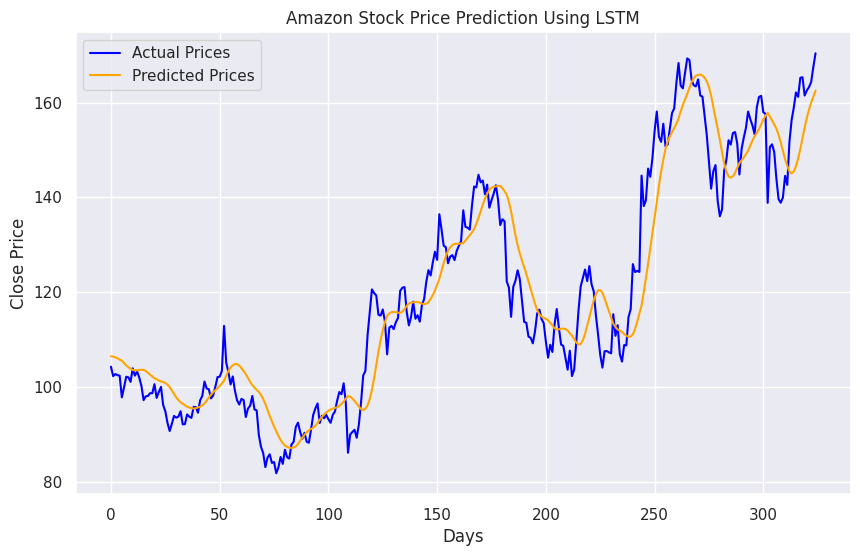

In [54]:
# Generate predictions for the whole dataset
predicted_prices = model.predict(X_train)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Plot actual vs. predicted stock prices
plt.figure(figsize=(10, 6))
plt.plot(df_AMZN['Close/Last'].values[look_back:], label='Actual Prices', color='blue')
plt.plot(predicted_prices, label='Predicted Prices', color='orange')
plt.title('Amazon Stock Price Prediction Using LSTM')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.legend()
plt.show()
